<a href="https://colab.research.google.com/github/AnkurMali/IST597_SP21/blob/main/SP21_IST597_week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IST597:- Multi-layer Perceptron
#Week 7/8 tutorial
Building your first MLP in eager
Author :- aam35

In [52]:
# -*- coding: utf-8 -*-
"""
Author:-aam35
"""

import numpy as np
import os
import sys
import tensorflow as tf
import time
# random seed to get the consistent result
tf.random.set_seed(1234)

minibatch_size = 128
learning_rate = 0.1

In [29]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype(np.float32).reshape(-1, 784) / 255.0
x_test = x_test.astype(np.float32).reshape(-1, 784) / 255.0
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(128)
train_dataset_full = train_dataset.shuffle(buffer_size=1024).batch(len(train_dataset))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(len(test_dataset))

In [35]:
## model 1
size_input = 784 # MNIST data input (img shape: 28*28)
size_hidden = 256
size_output = 10 # MNIST total classes (0-9 digits)


# Define class to build mlp model
class MLP(object):
    def __init__(self, size_input, size_hidden, size_output, device=None):
        """
        size_input: int, size of input layer
        size_hidden: int, size of hidden layer
        size_output: int, size of output layer
        device: str or None, either 'cpu' or 'gpu' or None. If None, the device to be used will be decided automatically during Eager Execution
        """
        self.size_input, self.size_hidden, self.size_output, self.device =\
        size_input, size_hidden, size_output, device
    
        # Initialize weights between input layer and hidden layer
        self.W1 = tf.Variable(tf.random.normal([self.size_input, self.size_hidden],stddev=0.1),name="W1")
        # Initialize biases for hidden layer
        self.b1 = tf.Variable(tf.zeros([1, self.size_hidden]), name = "b1")
        # Initialize weights between hidden layer and output layer
        self.W2 = tf.Variable(tf.random.normal([self.size_hidden, self.size_output],stddev=0.1),name="W2")
        # Initialize biases for output layer
        self.b2 = tf.Variable(tf.random.normal([1, self.size_output]),name="b2")
        self.z = []
        self.z.append(self.W1)
        self.z.append(self.b1)
        self.z.append(self.W2)
        self.z.append(self.b2)
    

        
        # Define variables to be updated during backpropagation
        self.variables = [self.W1, self.b1,self.W2, self.b2]
        
    
    # prediction
    def forward(self, X):
        """
        forward pass
        X: Tensor, inputs
        """
        if self.device is not None:
            with tf.device('gpu:0' if self.device=='gpu' else 'cpu'):
                self.y = self.compute_output(X)
        else:
            self.y = self.compute_output(X)
      
        return self.y
    
    ## loss function
    def loss(self, y_pred, y_true):
        '''
        y_pred - Tensor of shape (batch_size, size_output)
        y_true - Tensor of shape (batch_size, size_output)
        '''
        y_true_tf = tf.cast(tf.reshape(y_true, (-1, self.size_output)), dtype=tf.float32)
        y_pred_tf = tf.cast(y_pred, dtype=tf.float32)
        return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_pred_tf, labels=y_true_tf))
        
  
    @tf.function
    def backward(self, X_train, y_train):
        """
        backward pass
        """
        # optimizer
        # Test with SGD,Adam, RMSProp, Momentum, AdaGrad, 2^nd Order 
        optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=learning_rate) #Optimizer
        #optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
        with tf.GradientTape() as tape:
            predicted = self.forward(X_train)
            current_loss = self.loss(predicted, y_train)
        grads = tape.gradient(current_loss, self.variables)
        #tvars1 = tf.compat.v1.trainable_variables()
        #print(tvars1)
        optimizer.apply_gradients(zip(grads, self.z))
        
        
    def compute_output(self, X):
        """
        Custom method to obtain output tensor during forward pass
        """
        # Cast X to float32
        X_tf = tf.cast(X, dtype=tf.float32)
        #Remember to normalize your dataset before moving forward
        # Compute values in hidden layer
        what = tf.matmul(X_tf, self.W1) + self.b1
        hhat = tf.nn.relu(what)
        # Compute output
        output = tf.matmul(hhat, self.W2) + self.b2
        #Now consider two things , First look at inbuild loss functions if they work with softmax or not and then change this
        #Second add tf.Softmax(output) and then return this variable
        #print(output)
        return (output)
        #return output


In [61]:
## model 2
size_input = 784 # MNIST data input (img shape: 28*28)
size_hidden = 256
size_output = 10 # MNIST total classes (0-9 digits)


# Define class to build mlp model
class MLP_2(object):
    def __init__(self, size_input, size_hidden, size_output, device=None):
        """
        size_input: int, size of input layer
        size_hidden: int, size of hidden layer
        size_output: int, size of output layer
        device: str or None, either 'cpu' or 'gpu' or None. If None, the device to be used will be decided automatically during Eager Execution
        """
        self.size_input, self.size_hidden, self.size_output, self.device =\
        size_input, size_hidden, size_output, device
    
        # Initialize weights between input layer and hidden layer
        self.W1 = tf.Variable(tf.random.normal([self.size_input, self.size_hidden],stddev=0.1),name="W_1")
        # Initialize biases for hidden layer
        self.b1 = tf.Variable(tf.zeros([1, self.size_hidden]), name = "b_1")
        # Initialize weights between hidden layer and output layer
        self.W2 = tf.Variable(tf.random.normal([self.size_hidden, self.size_output],stddev=0.1),name="W_2")
        # Initialize biases for output layer
        self.b2 = tf.Variable(tf.random.normal([1, self.size_output]),name="b_2")
    

        
        # Define variables to be updated during backpropagation
        self.variables = [self.W1, self.b1,self.W2, self.b2]
        
    
    # prediction
    def forward(self, X):
        """
        forward pass
        X: Tensor, inputs
        """
        if self.device is not None:
            with tf.device('gpu:0' if self.device=='gpu' else 'cpu'):
                self.y = self.compute_output(X)
        else:
            self.y = self.compute_output(X)
      
        return self.y
    
    ## loss function
    def loss(self, y_pred, y_true):
        '''
        y_pred - Tensor of shape (batch_size, size_output)
        y_true - Tensor of shape (batch_size, size_output)
        '''
        y_true_tf = tf.cast(tf.reshape(y_true, (-1, self.size_output)), dtype=tf.float32)
        y_pred_tf = tf.cast(y_pred, dtype=tf.float32)
        return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_pred_tf, labels=y_true_tf))
        
  
    @tf.function
    def backward(self, X_train, y_train):
        """
        backward pass
        """
        # optimizer
        # Test with SGD,Adam, RMSProp
        optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=learning_rate)
        #optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
        with tf.GradientTape() as tape:
            predicted = self.forward(X_train)
            current_loss = self.loss(predicted, y_train)
        grads = tape.gradient(current_loss, self.variables)
        optimizer.apply_gradients(zip(grads, self.variables))
        
        
    def compute_output(self, X):
        """
        Custom method to obtain output tensor during forward pass
        """
        # Cast X to float32
        X_tf = tf.cast(X, dtype=tf.float32)
        #Remember to normalize your dataset before moving forward
        # Compute values in hidden layer
        what = tf.matmul(X_tf, self.W1) + self.b1
        hhat = tf.nn.relu(what)
        hhat_tilda = tf.compat.v1.nn.dropout(hhat,rate=0.2)
        # Compute output
        output = tf.matmul(hhat_tilda, self.W2) + self.b2
        #Now consider two things , First look at inbuild loss functions if they work with softmax or not and then change this
        #Second add tf.Softmax(output) and then return this variable
        #print(output)
        return (output)
        #return output


In [65]:
#from IPython.display import HTML
#HTML('<img src='/content/image1.gif>')
def show_gif(fname):
    import base64
    from IPython import display
    with open(fname, 'rb') as fd:
        b64 = base64.b64encode(fd.read()).decode('ascii')
    return display.HTML(f'<img src="data:image/gif;base64,{b64}" />')


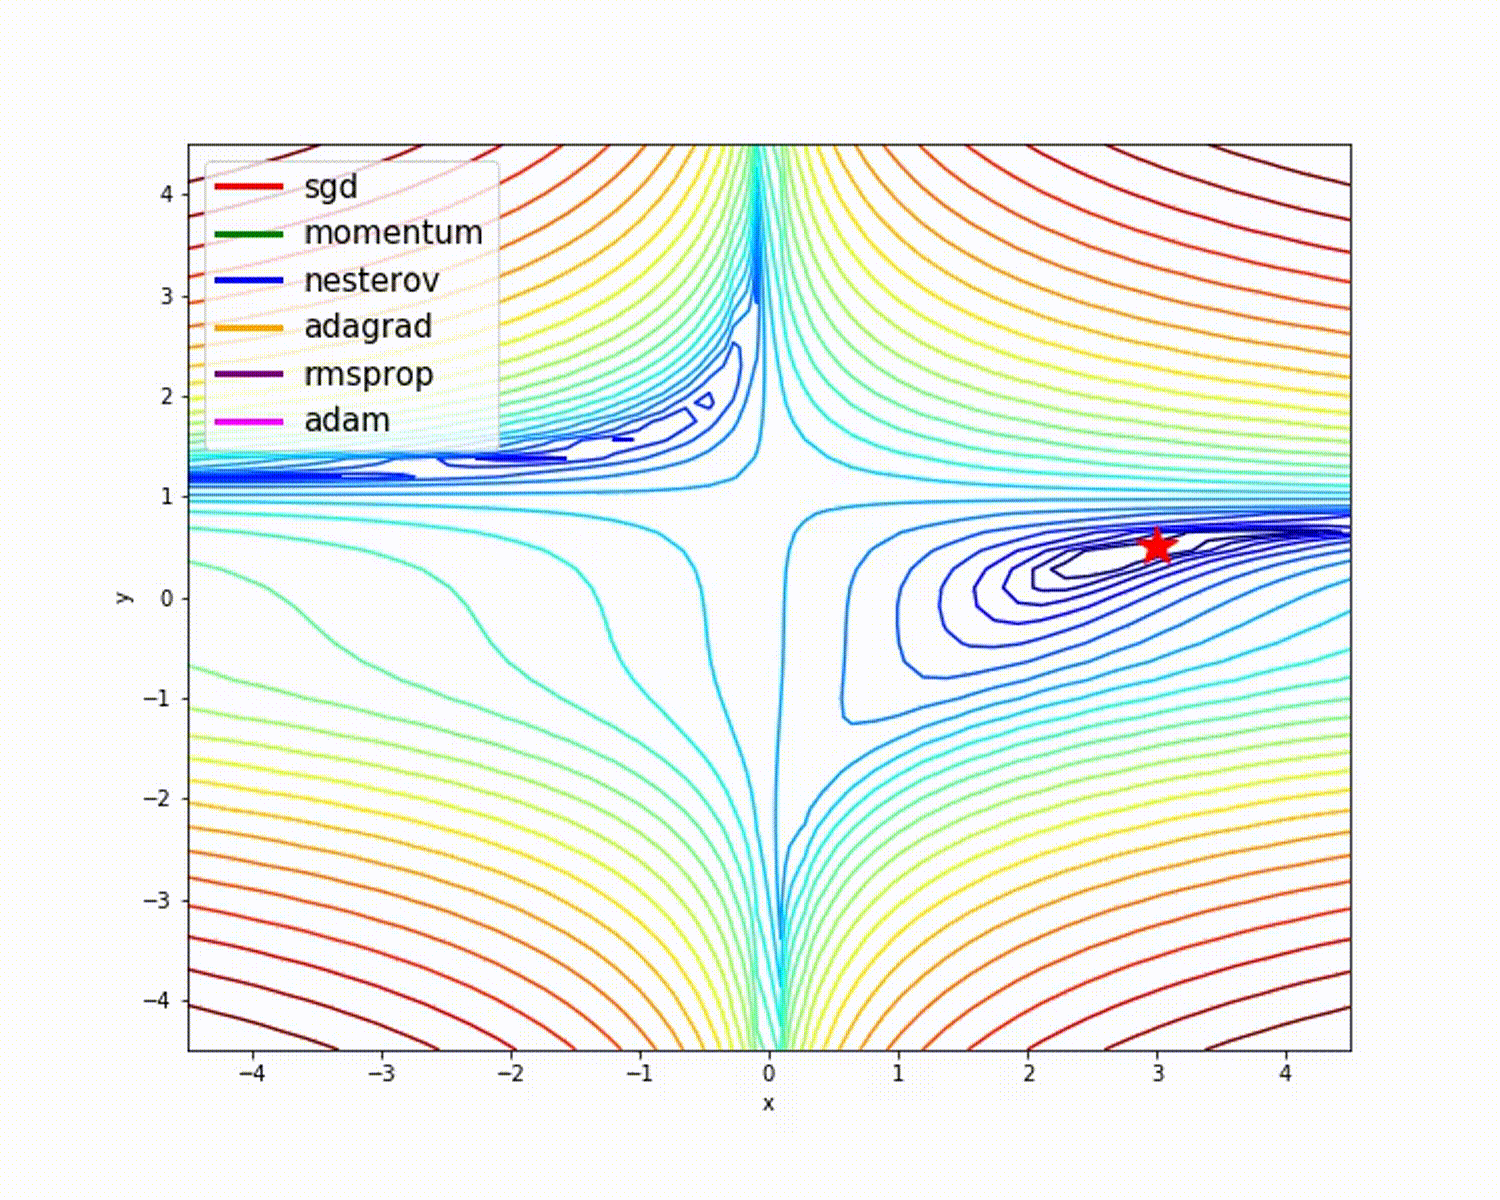

In [66]:
show_gif("/content/image1.gif")

MLP with regularizer

In [59]:
## model 3
size_input = 784 # MNIST data input (img shape: 28*28)
size_hidden = 256
size_output = 10 # MNIST total classes (0-9 digits)
beta = 0.1


# Define class to build mlp model
class MLP_3(object):
    def __init__(self, size_input, size_hidden, size_output, device=None):
        """
        size_input: int, size of input layer
        size_hidden: int, size of hidden layer
        size_output: int, size of output layer
        device: str or None, either 'cpu' or 'gpu' or None. If None, the device to be used will be decided automatically during Eager Execution
        """
        self.size_input, self.size_hidden, self.size_output, self.device =\
        size_input, size_hidden, size_output, device
    
        # Initialize weights between input layer and hidden layer
        self.W1 = tf.Variable(tf.random.normal([self.size_input, self.size_hidden],stddev=0.1),name="W_13")
        # Initialize biases for hidden layer
        self.b1 = tf.Variable(tf.zeros([1, self.size_hidden]), name = "b_13")
        # Initialize weights between hidden layer and output layer
        self.W2 = tf.Variable(tf.random.normal([self.size_hidden, self.size_output],stddev=0.1),name="W_23")
        # Initialize biases for output layer
        self.b2 = tf.Variable(tf.random.normal([1, self.size_output]),name="b_23")
    

        
        # Define variables to be updated during backpropagation
        self.variables = [self.W1, self.b1,self.W2, self.b2]
        
    
    # prediction
    def forward(self, X):
        """
        forward pass
        X: Tensor, inputs
        """
        if self.device is not None:
            with tf.device('gpu:0' if self.device=='gpu' else 'cpu'):
                self.y = self.compute_output(X)
        else:
            self.y = self.compute_output(X)
      
        return self.y
    
    ## loss function
    def loss(self, y_pred, y_true):
        '''
        y_pred - Tensor of shape (batch_size, size_output)
        y_true - Tensor of shape (batch_size, size_output)
        '''
        y_true_tf = tf.cast(tf.reshape(y_true, (-1, self.size_output)), dtype=tf.float32)
        y_pred_tf = tf.cast(y_pred, dtype=tf.float32)
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_pred_tf, labels=y_true_tf))
        regularizers = tf.nn.l2_loss(self.W1) + tf.nn.l2_loss(self.W2)
        Reg_loss = tf.reduce_mean(loss + beta * regularizers)
        return Reg_loss
        
  
    @tf.function
    def backward(self, X_train, y_train):
        """
        backward pass
        """
        # optimizer
        # Test with SGD,Adam, RMSProp
        optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=learning_rate)
        #optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
        with tf.GradientTape() as tape:
            predicted = self.forward(X_train)
            current_loss = self.loss(predicted, y_train)
        grads = tape.gradient(current_loss, self.variables)
        optimizer.apply_gradients(zip(grads, self.variables))
        
        
    def compute_output(self, X):
        """
        Custom method to obtain output tensor during forward pass
        """
        # Cast X to float32
        X_tf = tf.cast(X, dtype=tf.float32)
        #Remember to normalize your dataset before moving forward
        # Compute values in hidden layer
        what = tf.matmul(X_tf, self.W1) + self.b1
        hhat = tf.nn.relu(what)
        # Compute output
        output = tf.matmul(hhat, self.W2) + self.b2
        #Now consider two things , First look at inbuild loss functions if they work with softmax or not and then change this
        #Second add tf.Softmax(output) and then return this variable
        #print(output)
        return (output)
        #return output



create accuracy function which takes prediction and targets as input


In [16]:
def accuracy_function(yhat,true_y):
  correct_prediction = tf.equal(tf.argmax(yhat, 1), tf.argmax(true_y, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  return accuracy

  

In [73]:
# Initialize model using GPU
mlp_on_cpu = MLP(size_input, size_hidden, size_output, device='gpu')

num_epochs = 8

time_start = time.time()
num_train = 55000 #~~ 60k


for epoch in range(num_epochs):
        loss_total = tf.Variable(0, dtype=tf.float32)
        accuracy_train = 0.0
        for step,(inputs, outputs) in enumerate(train_dataset):
            preds = mlp_on_cpu.forward(inputs)
            loss_total = loss_total + mlp_on_cpu.loss(preds, outputs)
            accuracy_train += accuracy_function(preds,outputs)
            mlp_on_cpu.backward(inputs, outputs)
            #print('Number of Epoch = {} - loss:= {:.4f}'.format(epoch + 1, loss_total.numpy() / num_train))
            #preds = mlp_on_cpu.compute_output(x)
            
        accuracy_train = accuracy_train/step * 100
        print ("Number of Epoch == {} -- Training Accuracy = {:.2f}".format(epoch, accuracy_train.numpy()))
        
        # preds_val = mlp_on_cpu.compute_output(data.validation.images)
        # accuracy_val = accuracy_function(preds_val,data.validation.labels)
        # accuracy_val = accuracy_val * 100
        # print ("Validation Accuracy = {}".format(accuracy_val.numpy()))
 
    
# test accuracy
for step,(x, y) in enumerate(test_dataset):
  preds_test = mlp_on_cpu.compute_output(x)
  accuracy_test = accuracy_function(preds_test,y)
  # To keep sizes compatible with model
  accuracy_test = accuracy_test * 100
  print ("Test Accuracy = {}".format(accuracy_test.numpy()))

        
time_taken = time.time() - time_start
print('\nTotal time taken (in seconds): {:.2f}'.format(time_taken))
#For per epoch_time = Total_Time / Number_of_epochs

Number of Epoch == 0 -- Training Accuracy = 87.87
Number of Epoch == 1 -- Training Accuracy = 93.38
Number of Epoch == 2 -- Training Accuracy = 94.82
Number of Epoch == 3 -- Training Accuracy = 95.59
Number of Epoch == 4 -- Training Accuracy = 96.25
Number of Epoch == 5 -- Training Accuracy = 96.64
Number of Epoch == 6 -- Training Accuracy = 97.03
Number of Epoch == 7 -- Training Accuracy = 97.31
Test Accuracy = 96.6500015258789

Total time taken (in seconds): 37.89


For one layer feed-forward we can easily reach in high 90's
# Things to try
* Increase the depth or layers of this model and analyze the change in convergence
* Change the optimizer , play with learning rate , try various activation functions.
* You can also use various initialization method[We have used random_init, play with xavier or orthogonal]
* Tweak the network, for better understanding how hyper-parameters plays a vital role in achieving state of the art.
* Play with Patience scheduling and cosine or polynomial decay. 
* Work with early stopping